<a href="https://colab.research.google.com/github/deepaksh2007/covid19/blob/main/covid_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on world map

In [13]:
from google.colab import files
uploaded = files.upload()

Saving 02-12-2021.csv to 02-12-2021.csv


In [14]:
#path='https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/02-12-2021.csv'
df = pd.read_csv('02-12-2021.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3264 non-null   float64
 1   Admin2               3269 non-null   object 
 2   Province_State       3808 non-null   object 
 3   Country_Region       3979 non-null   object 
 4   Last_Update          3979 non-null   object 
 5   Lat                  3892 non-null   float64
 6   Long_                3892 non-null   float64
 7   Confirmed            3979 non-null   int64  
 8   Deaths               3979 non-null   int64  
 9   Recovered            3979 non-null   int64  
 10  Active               3977 non-null   float64
 11  Combined_Key         3979 non-null   object 
 12  Incident_Rate        3892 non-null   float64
 13  Case_Fatality_Ratio  3938 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.3+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-02-13 05:22:12,33.93911,67.709953,55445,2424,48390,4631.0,Afghanistan,142.428366,4.371900
1,NaN,NaN,NaN,Albania,2021-02-13 05:22:12,41.15330,20.168300,90835,1531,55243,34061.0,Albania,3156.404198,1.685474
2,NaN,NaN,NaN,Algeria,2021-02-13 05:22:12,28.03390,1.659600,110303,2932,75628,31743.0,Algeria,251.540197,2.658133
3,NaN,NaN,NaN,Andorra,2021-02-13 05:22:12,42.50630,1.521800,10427,106,9833,488.0,Andorra,13495.114217,1.016592
4,NaN,NaN,NaN,Angola,2021-02-13 05:22:12,-11.20270,17.873900,20294,490,18786,1018.0,Angola,61.747199,2.414507


In [15]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()


,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,33.93911,67.709953,55445,2424,48390,4631.0,142.428366,4.371900
1,Albania,41.15330,20.168300,90835,1531,55243,34061.0,3156.404198,1.685474
2,Algeria,28.03390,1.659600,110303,2932,75628,31743.0,251.540197,2.658133
3,Andorra,42.50630,1.521800,10427,106,9833,488.0,13495.114217,1.016592
4,Angola,-11.20270,17.873900,20294,490,18786,1018.0,61.747199,2.414507


In [16]:
### group the data by country

world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,55445,4631.0,48390,2424
1,Albania,90835,34061.0,55243,1531
2,Algeria,110303,31743.0,75628,2932
3,Andorra,10427,488.0,9833,106
4,Angola,20294,1018.0,18786,490
5,Antigua and Barbuda,419,211.0,199,9
6,Argentina,2015496,151307.0,1814160,50029
7,Armenia,168830,4854.0,160838,3138
8,Australia,28892,1867.0,26116,909
9,Austria,430870,14274.0,408426,8170


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



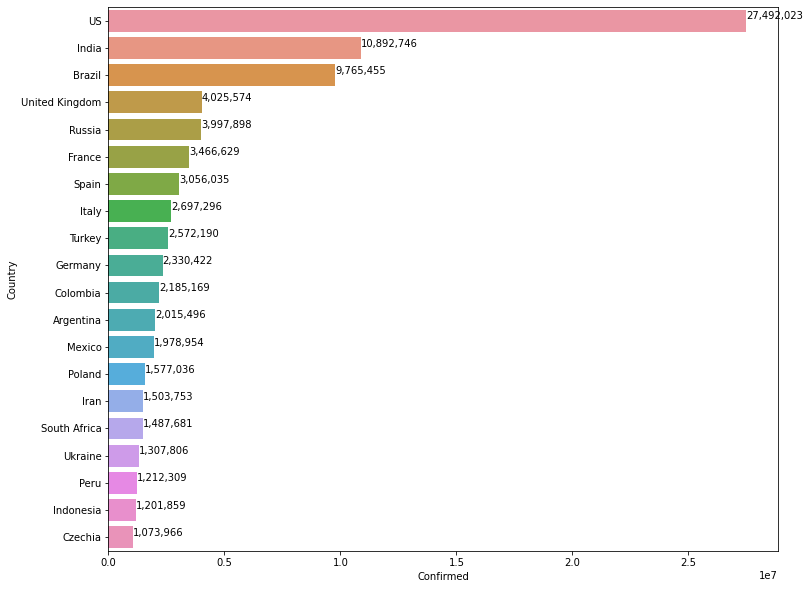

In [17]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
  plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



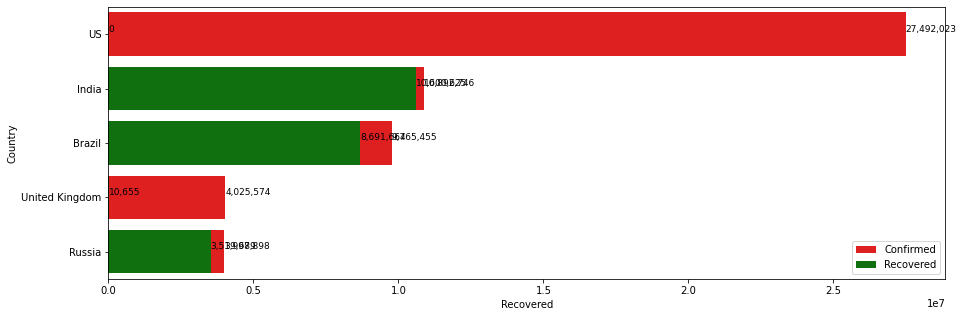

In [20]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

### Adding Texts for barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
  confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
  recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()


In [19]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()